In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
import glob
import os

In [49]:
race_name = 'Daytona' + '_race.csv'
filtered_lap_value = 70
filtered_speed_value = 110

### Find lap and speed values to filter by

   Unnamed: 0  Lap  LapTime  LapSpeed  RunningPos
0           0    0      NaN       NaN          33
1           1    1   51.972   173.170          36
2           2    2   47.562   189.227          38
3           3    3   48.186   186.776          41
4           4    4   51.880   173.477          41


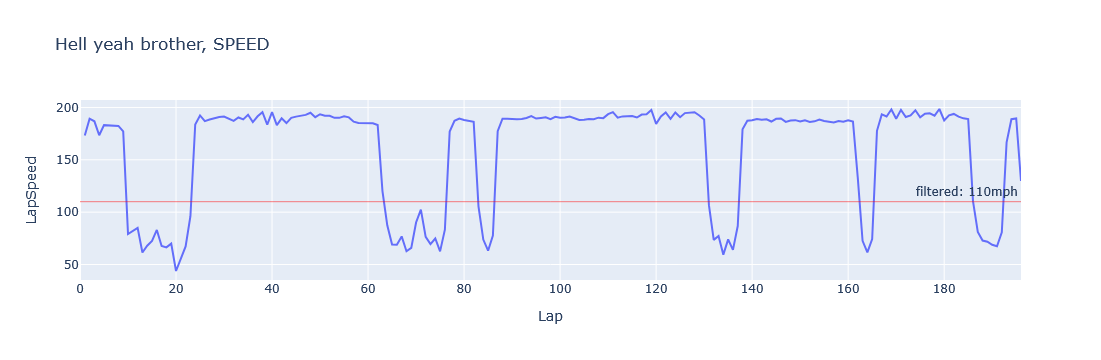

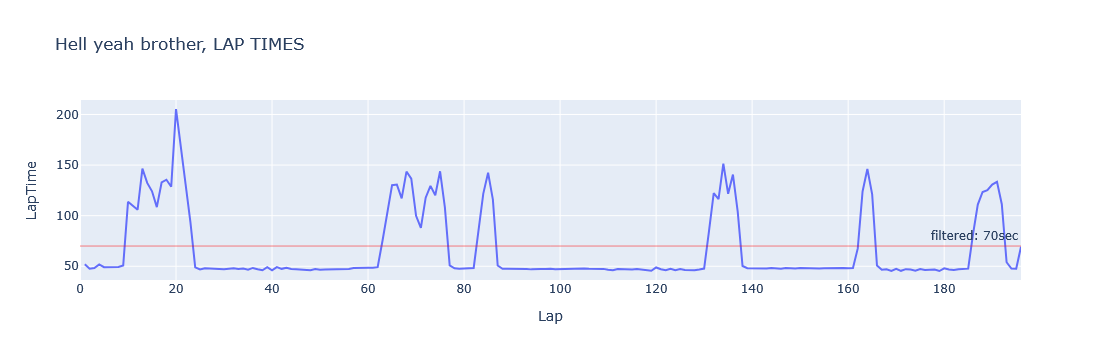

In [53]:
df = pd.read_csv('Carson Hocevar.csv')
df = df.drop([11,21])
print(df.head(5))

# check lap_value to use
annotation = 'filtered: ' + str(filtered_speed_value) + 'mph'
fig = px.line(df, x='Lap', y='LapSpeed', title='Hell yeah brother, SPEED')
fig.add_hline(y=filtered_speed_value, line_width=0.5, line_color='red', annotation_text=annotation)
fig.show()

# check speed_value to use
annotation = 'filtered: ' + str(filtered_lap_value) + 'sec'
fig = px.line(df, x='Lap', y='LapTime', title='Hell yeah brother, LAP TIMES')
fig.add_hline(y=filtered_lap_value, line_width=0.5, line_color='red', annotation_text=annotation)
fig.show()

del df

# Collect Summary info for Race_Name.csv

In [52]:
csv_files = glob.glob('*[!_race][!_summary][!_500].csv')

df_list = []

for file in csv_files:
    df = pd.read_csv(file)
    # Driver_Name
    Driver_Name = file.rstrip('.csv')
    # Start_Pos
    Start_Pos = df['RunningPos'].head(1).values
    # Lowest_Pos
    Lowest_Pos = df['RunningPos'].max()
    # Highest_Pos
    Highest_Pos = df['RunningPos'].min()
    # Ending_Pos
    Ending_Pos = df['RunningPos'].tail(1).values
    # Ave_Pos
    Ave_Pos = round(df['RunningPos'].sum() / len(df['RunningPos']), 4)
    # Pos_Change
    Pos_Change = Start_Pos.astype(int) - Ending_Pos
    # Slowest_Lap
    filtered_lap = [x for x in df['LapTime'] if x <= filtered_lap_value]
    Slowest_Lap = max(filtered_lap)
    # Fastest_Lap
    filtered_lap = [x for x in df['LapTime'] if x <= filtered_lap_value]
    Fastest_Lap = min(filtered_lap)
    # Ave_Lap
    Ave_Lap = round(sum(filtered_lap) / len(filtered_lap), 4)
    # Lowest_Speed
    filtered_speed = [x for x in df['LapSpeed'] if x >= filtered_speed_value]
    Lowest_Speed = min(filtered_speed)
    # Highest_Speed
    filtered_speed = [x for x in df['LapSpeed'] if x >= filtered_speed_value]
    Highest_Speed = max(filtered_speed)
    # Ave_Speed
    filtered_speed = [x for x in df['LapSpeed'] if x >= filtered_speed_value]
    Ave_Speed = round(sum(filtered_speed) / len(filtered_speed), 4)

    # combine all into main race csv
    data = {'Driver_Name': Driver_Name,'Start_Pos': Start_Pos,'Lowest_Pos': Lowest_Pos,'Highest_Pos': Highest_Pos,'Ending_Pos': Ending_Pos,'Pos_Change': Pos_Change,'Slowest_Lap': Slowest_Lap,'Fastest_Lap': Fastest_Lap,'Ave_Lap': Ave_Lap,'Highest_Speed': Highest_Speed,'Lowest_Speed': Lowest_Speed,'Ave_Speed': Ave_Speed,'Pos_Change': Pos_Change}
    # append dataframe to the list
    df_list.append(data)

race_data = pd.DataFrame(df_list)


# clean Start_Pos
clean_start_pos = race_data['Start_Pos'].astype(str)
clean_start_pos = clean_start_pos.str.strip('[]')

# clean Ending_Pos
clean_end_pos = race_data['Ending_Pos'].astype(str)
clean_end_pos = clean_end_pos.str.strip('[]')

# clean Pos_Change
clean_pos_change = race_data['Pos_Change'].astype(str)
clean_pos_change = clean_pos_change.str.strip('[]')

race_data['Start_Pos'] = clean_start_pos
race_data['Ending_Pos'] = clean_end_pos
race_data['Pos_Change'] = clean_pos_change
print(race_data)

# export as csv

race_data.to_csv(race_name)

             Driver_Name Start_Pos  Lowest_Pos  Highest_Pos Ending_Pos  \
0        AJ Allmendinger        13          39            6         39   
1           Justin Haley        35          41            3         19   
2              Erik Jone         4          32            4         13   
3           Corey LaJoie        12          34            1         22   
4              Ty Dillon         7          38            1         14   
5         Chris Buescher         6          33            2         10   
6          Chase Elliott        17          30            1          4   
7            Ryan Blaney        16          32            1          1   
8          Tyler Reddick        11          32            2          2   
9             Kyle Busch        21          35            2         33   
10       Justin Allgaier        19          34            3          3   
11          Denny Hamlin         8          38            1         24   
12        Jimmie Johnson        40    